In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import daft
import seaborn
import matplotlib.pyplot as plt


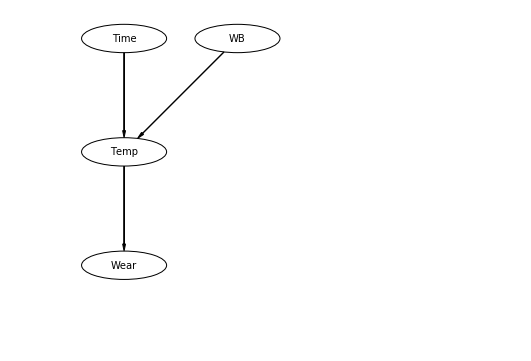

In [2]:
pgm = daft.PGM([9,6],origin=[1, 0.5])
pgm.add_node(daft.Node('Tme','Time',3,6,aspect=3))
pgm.add_node(daft.Node('WB','WB',5,6,aspect=3))
pgm.add_node(daft.Node('Temp','Temp',3,4,aspect=3))
pgm.add_node(daft.Node('Wear','Wear',3,2,aspect=3))
pgm.add_edge('Tme','Temp')
pgm.add_edge('WB','Temp')
pgm.add_edge('Temp','Wear')
pgm.render();


In [40]:
df = pd.read_csv('C:/Users/User/Desktop/Football/Bayes-master/Bayes-master/Temp.csv',sep=';')

df.index
Maxlife = 1000
intialTime=20

In [4]:
df.describe()

,Time,Temp,RunningTemp,Wear,Slot
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,8.400000,146.666667,212.533333,17.133333,8.000000
std,14.316823,63.994047,63.482131,5.208052,4.472136
min,1.000000,100.000000,152.000000,12.000000,1.000000
25%,1.000000,100.000000,163.000000,13.000000,4.500000
50%,2.000000,100.000000,193.000000,16.000000,8.000000
75%,6.500000,200.000000,250.500000,20.000000,11.500000
max,50.000000,300.000000,383.000000,31.000000,15.000000


In [5]:
temp_mean= df.Temp.mean()
temp_mean

146.66666666666666

In [6]:
df.skew()

Time           2.242714
Temp           1.084627
RunningTemp    1.473369
Wear           1.428295
Slot           0.000000
dtype: float64

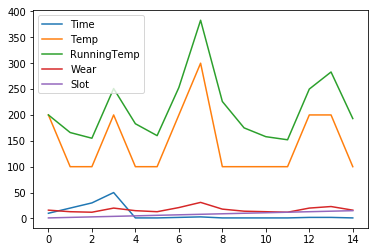

In [7]:
df.plot()
plt.show()

In [8]:
df.std

<bound method DataFrame.std of     Time  Temp  RunningTemp  Wear  Slot
0     10   200          200    16     1
1     20   100          166    13     2
2     30   100          155    12     3
3     50   200          251    20     4
4      1   100          183    15     5
5      1   100          160    13     6
6      2   200          253    21     7
7      3   300          383    31     8
8      1   100          226    18     9
9      1   100          175    14    10
10     1   100          158    13    11
11     1   100          152    12    12
12     2   200          250    20    13
13     2   200          283    23    14
14     1   100          193    16    15>

In [41]:
model = pm.Model();
with model:
    time = pm.Normal('time',intialTime)
    temp = pm.Normal('temp',mu=time)
    wear =pm.Normal('wear',mu=temp)
    trace = pm.sample(10000,tune=5000,progressbar=True)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [wear, temp, time]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013809A69978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000138170F69B0>]], dtype=object)

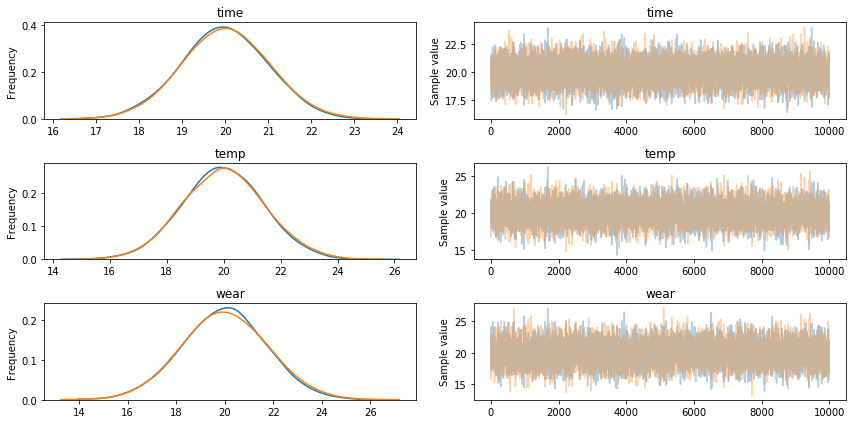

In [42]:
pm.traceplot(trace)

In [43]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
time,19.996721,1.000429,0.010428,18.053418,21.986535,8075.322701,1.000351
temp,19.995950,1.414644,0.016001,17.227075,22.777855,6508.323367,1.000109
wear,19.996114,1.730979,0.019291,16.561181,23.332489,7375.832674,1.000024


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001381516BFD0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000013812BE9940>], dtype=object)

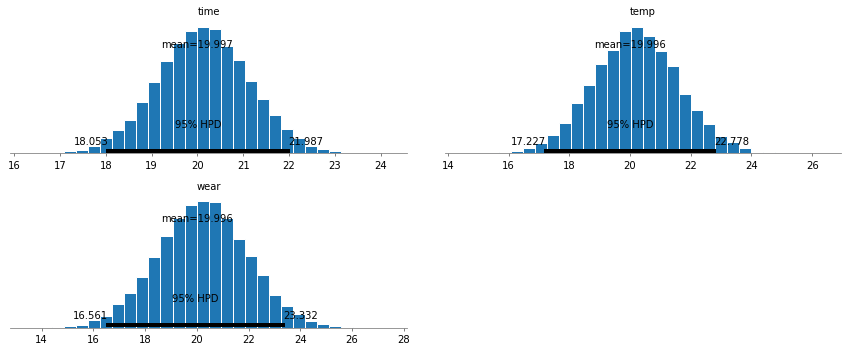

In [44]:
pm.plot_posterior(trace)

In [45]:
pred = pd.DataFrame({
    "Wear": trace["wear"][5000:],
    "Temp": trace["temp"][5000:],
    "Time": trace["time"][5000],
 
})


In [46]:
pred.Wear.mean()


19.997490981110083

In [47]:
pred.Temp.mean()
loopTime = pred.Time.mean()
loopWear = pred.Wear.mean()
loopTemp = pred.Temp.mean()

In [48]:
loopWear

19.997490981110083

In [49]:
loopTemp

19.997504067804417

In [50]:
loopTime

19.456915401161357

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [wear2, Temp2, Time2]


10  sec 64 % life is left


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [wear2, Temp2, Time2]


20  sec 26 % life is left


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [wear2, Temp2, Time2]


30  sec -51 % life is left


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [wear2, Temp2, Time2]


50  sec -207 % life is left


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [wear2, Temp2, Time2]


10  sec -515 % life is left


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [wear2, Temp2, Time2]


5  sec -1130 % life is left


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [wear2, Temp2, Time2]


10  sec -2361 % life is left


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [wear2, Temp2, Time2]


10  sec -4823 % life is left


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [wear2, Temp2, Time2]


10  sec -9747 % life is left


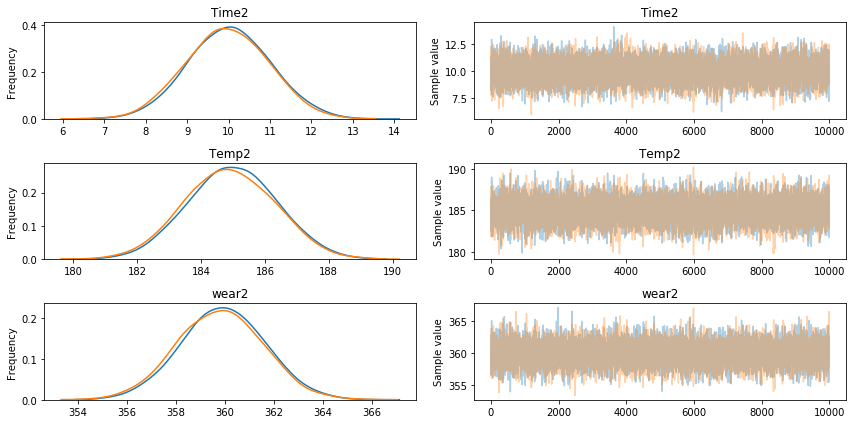

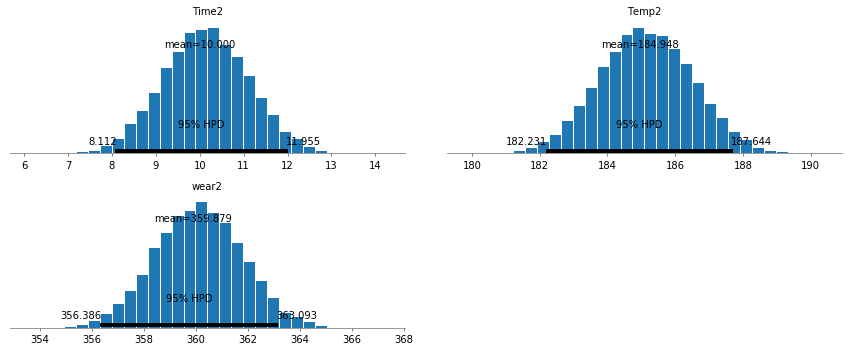

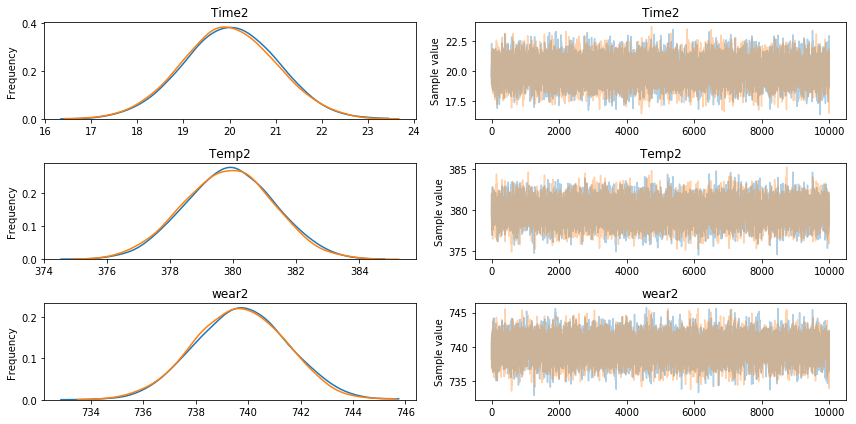

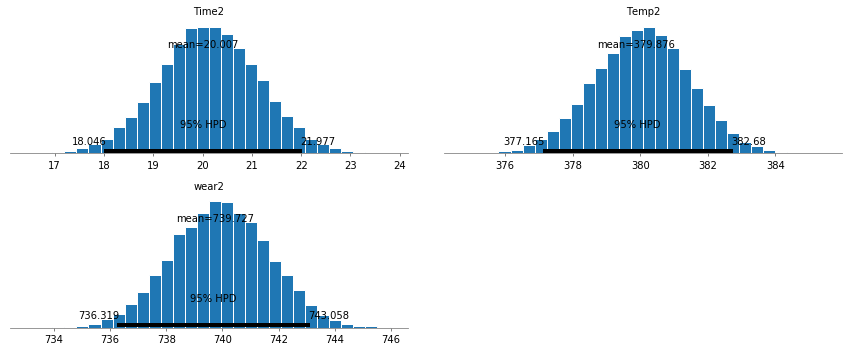

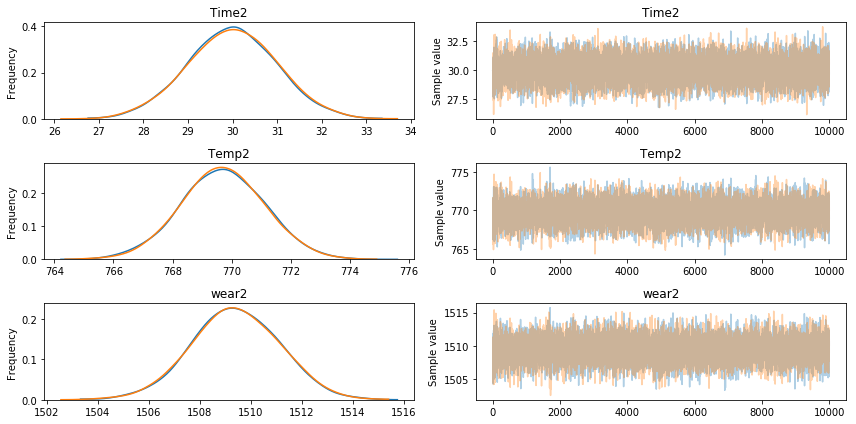

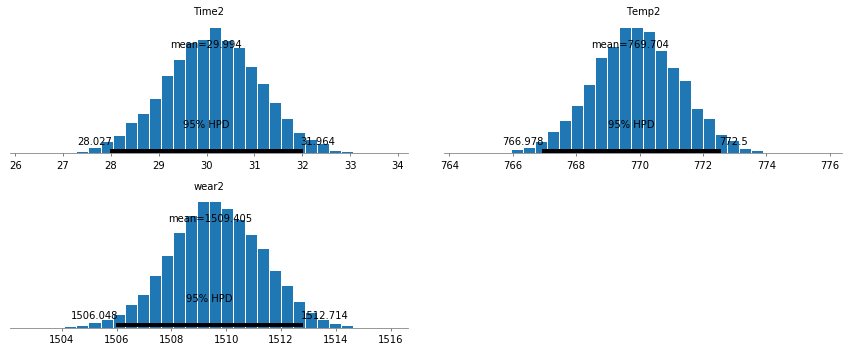

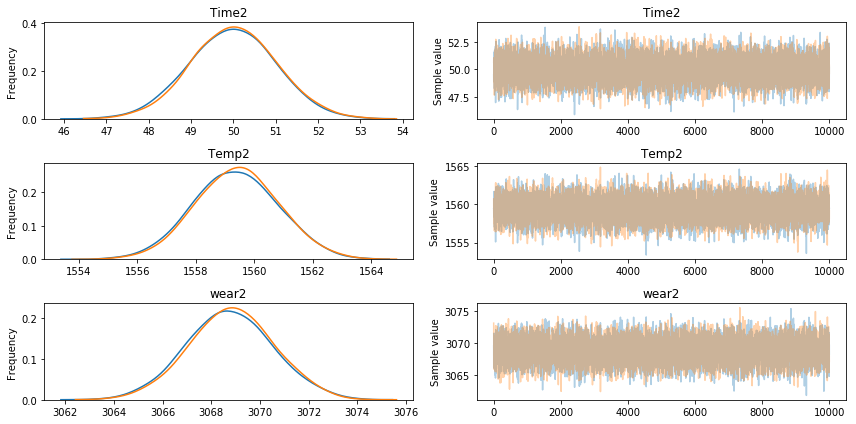

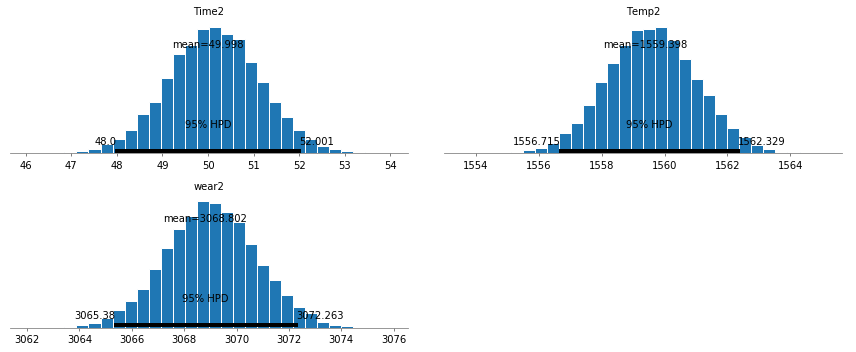

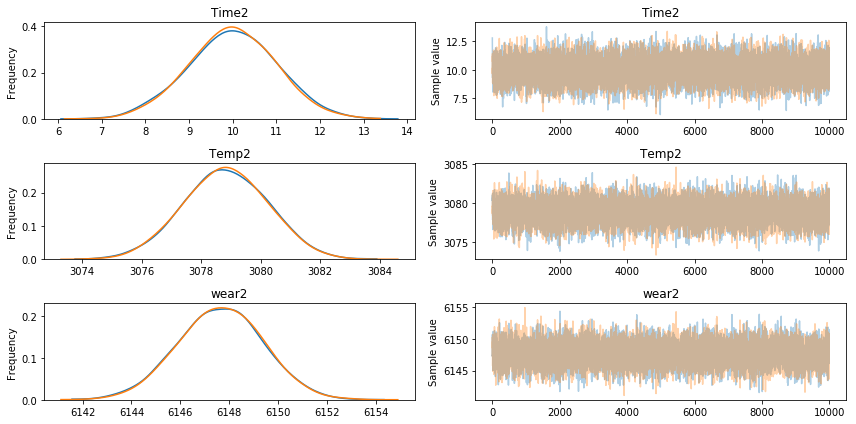

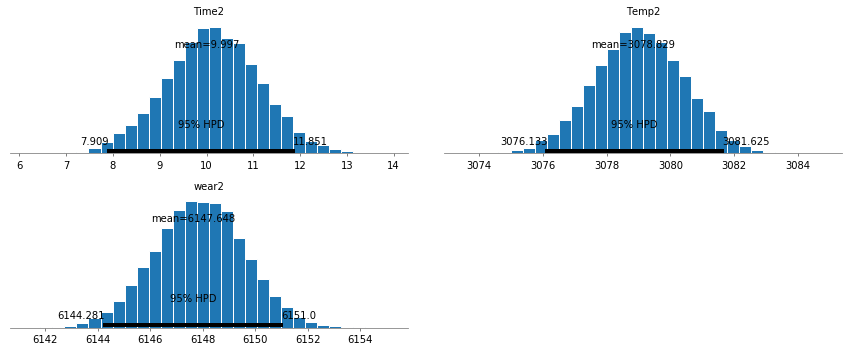

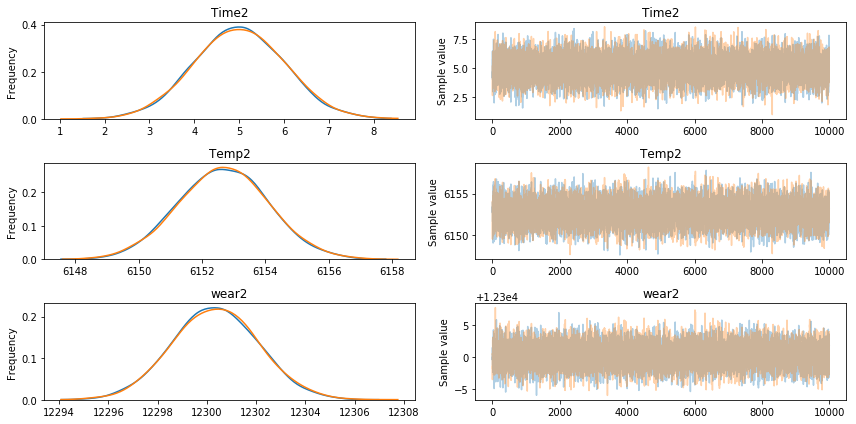

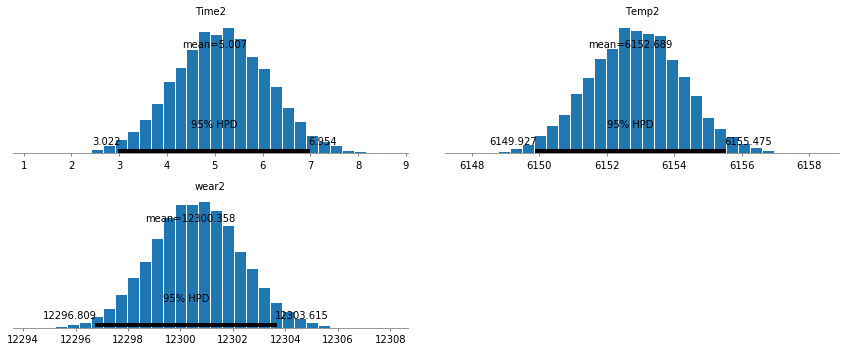

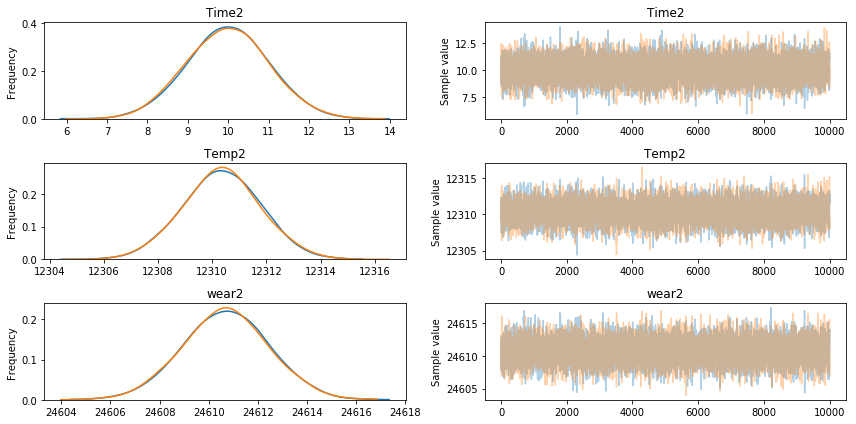

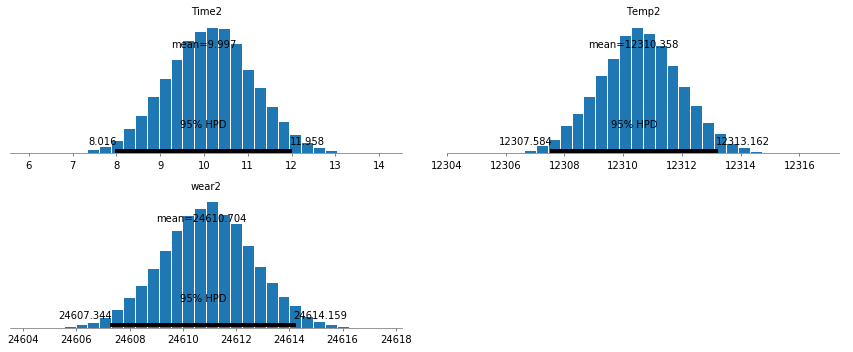

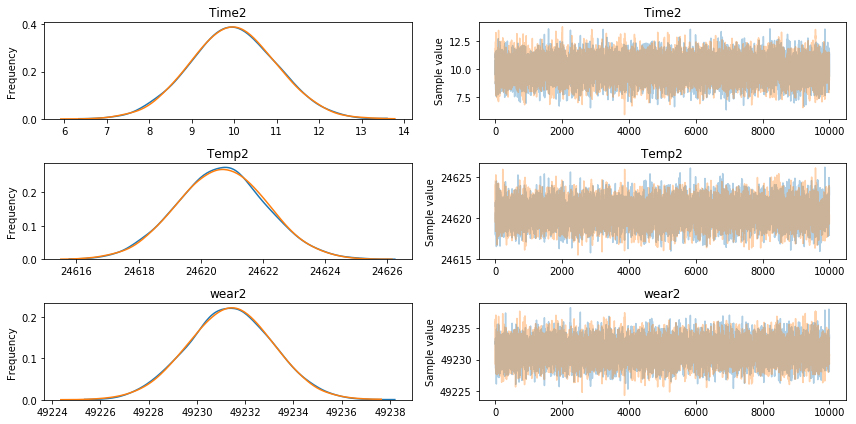

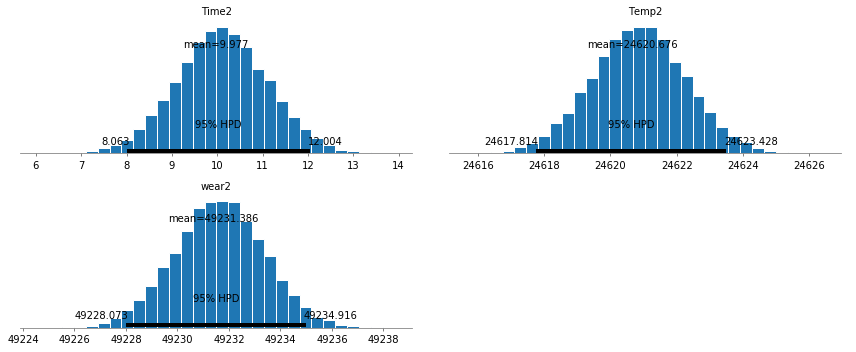

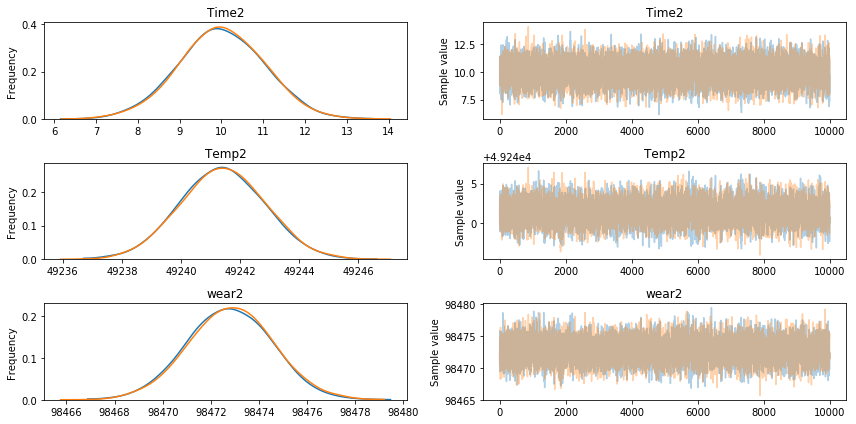

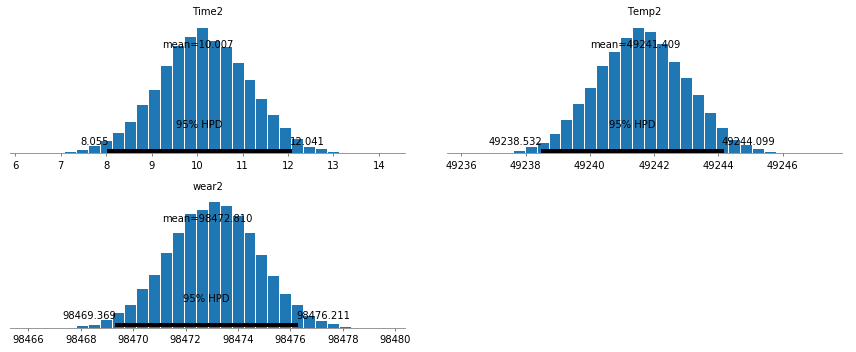

In [55]:
   
for i in range(0,len(df.Time)-1):    
    model2 = pm.Model();    
    with model2:        
        Time2  = pm.Normal('Time2',df.Time[i])
        Temp2  = pm.Normal('Temp2',mu=Time2+loopWear)
        wear2  = pm.Normal('wear2',mu=Temp2+loopWear)
        trace2 = pm.sample(10000,tune=5000,progressbar=True)
        pred2  = pd.DataFrame({
        "Wear2": trace2["wear2"][5000:],
        "temp2": trace2["Temp2"][5000:],
        "time2": trace2["Time2"][5000:],
        })
        loopTime = pred2.time2.mean()
        loopWear = pred2.Wear2.mean()        
        print(df.Time[i],' sec',round(((Maxlife-loopWear)/Maxlife)*100),'% life is left')
        pm.traceplot(trace2)
        pm.summary(trace2)
        pm.plot_posterior(trace2)
    
    
    
    
    

In [52]:
df

,Time,Temp,RunningTemp,Wear,Slot
0,10,200,200,16,1
1,20,100,166,13,2
2,30,100,155,12,3
3,50,200,251,20,4
4,10,100,183,15,5
5,5,100,160,13,6
6,10,200,253,21,7
7,10,300,383,31,8
8,10,100,226,18,9
9,10,100,175,14,10
